In [4]:
import tensorflow as tf 

from tensorflow.keras import layers, models, optimizers, callbacks  
from tensorflow.keras.models import Sequential, load_model 

from tensorflow.keras.applications import EfficientNetV2B0  

from tensorflow.keras.applications.efficientnet import preprocess_input  

import numpy as np 
import matplotlib.pyplot as plt  

import seaborn as sns  

from sklearn.metrics import confusion_matrix, classification_report  
import gradio as gr  

from PIL import Image  

import os


In [ ]:
print("Current Working Directory:", os.getcwd())
current_directory = os.getcwd()
train_path = os.path.join(current_directory, "E-Waste classification dataset","modified-dataset","train")
valid_path = os.path.join(current_directory, "E-Waste classification dataset","modified-dataset","valid")
test_path = os.path.join(current_directory, "E-Waste classification dataset","modified-dataset","test")
print("Train Path: ", train_path)
print("valid Path: ", valid_path)
print("test Path: ", test_path)

Current Working Directory: d:\code\Python Programming\E-Waste Generation Classification
Train Path:  d:\code\Python Programming\E-Waste Generation Classification\E-Waste classification dataset\modified-dataset\train
valid Path:  d:\code\Python Programming\E-Waste Generation Classification\E-Waste classification dataset\modified-dataset\valid
test Path:  d:\code\Python Programming\E-Waste Generation Classification\E-Waste classification dataset\modified-dataset\test


In [39]:
datatrain= tf.keras.utils.image_dataset_from_directory(train_path,shuffle = True, image_size = (256,256), batch_size = 32, validation_split= False)

Found 2400 files belonging to 10 classes.


In [40]:
datatest=tf.keras.utils.image_dataset_from_directory(test_path,shuffle = False, image_size = (256,256), batch_size = 32, validation_split= False)

Found 300 files belonging to 10 classes.


In [41]:
datavalid = tf.keras.utils.image_dataset_from_directory(valid_path,shuffle = True, image_size = (256,256), batch_size = 32, validation_split= False)

Found 300 files belonging to 10 classes.


In [12]:
print(len(datatrain.class_names))
class_names = datatrain.class_names
print(class_names)

10
['Battery', 'Keyboard', 'Microwave', 'Mobile', 'Mouse', 'PCB', 'Player', 'Printer', 'Television', 'Washing Machine']


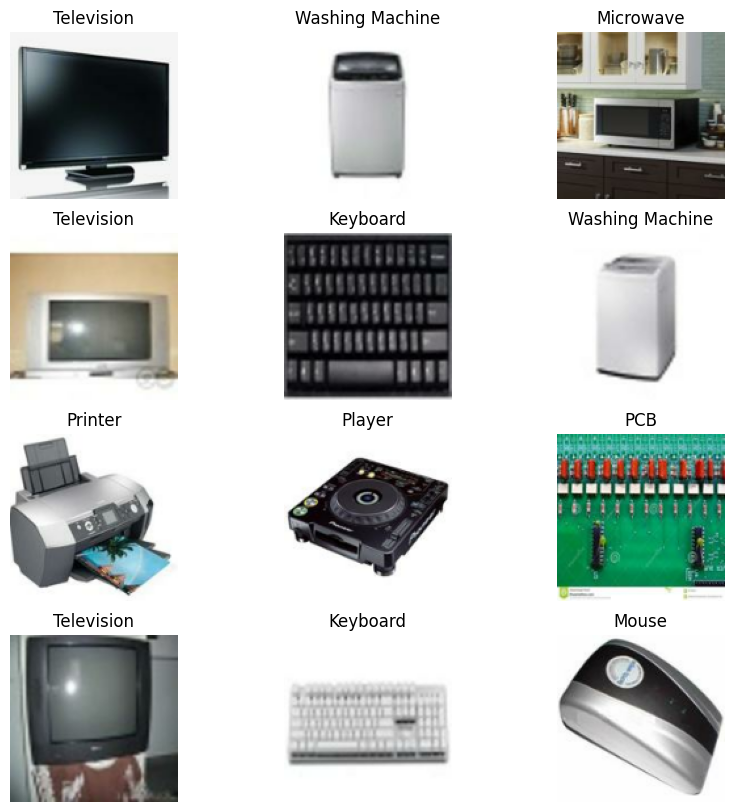

In [ ]:

plt.figure(figsize=(10, 10))


for images, labels in datatrain.take(1):

    for i in range(12):
        
        ax = plt.subplot(4, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
def plot_class_distribution(dataset, title="Class Distribution"):
    """
    Plots the number of items per class in a given dataset.

    Args:
        dataset: A tf.data.Dataset object created using image_dataset_from_directory
        title: Title for the plot (e.g., 'Train Data Distribution')
    """

    class_counts = {}  

    for images, labels in dataset:
        
        for label in labels.numpy():
            class_name = dataset.class_names[label]  
            
            class_counts[class_name] = class_counts.get(class_name, 0) + 1
    print(class_counts)

    # Prepare data for plotting
    class_names = list(class_counts.keys())  
    counts = list(class_counts.values())     
    # Create the bar plot
    plt.figure(figsize=(10, 6))  
    plt.bar(class_names, counts, color='skyblue')  
    plt.xlabel("Class")  
    plt.ylabel("Number of Items")  
    plt.title(title)  
    plt.xticks(rotation=45)  
    plt.tight_layout()  
    plt.show()  


{'Television': 240, 'Microwave': 240, 'Washing Machine': 240, 'Keyboard': 240, 'Mobile': 240, 'PCB': 240, 'Player': 240, 'Mouse': 240, 'Printer': 240, 'Battery': 240}


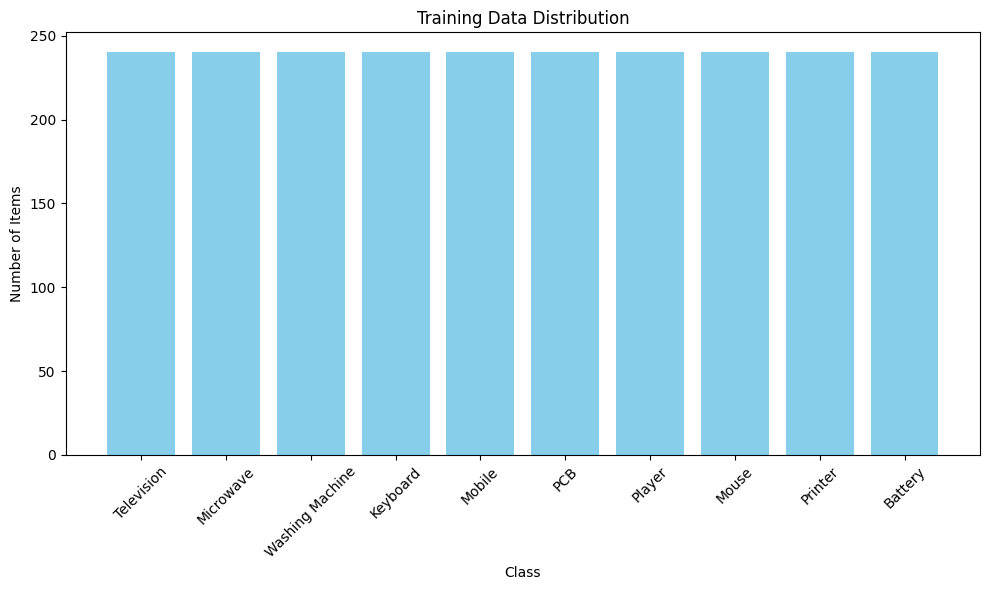

{'Mouse': 30, 'Battery': 30, 'PCB': 30, 'Washing Machine': 30, 'Keyboard': 30, 'Printer': 30, 'Television': 30, 'Player': 30, 'Mobile': 30, 'Microwave': 30}


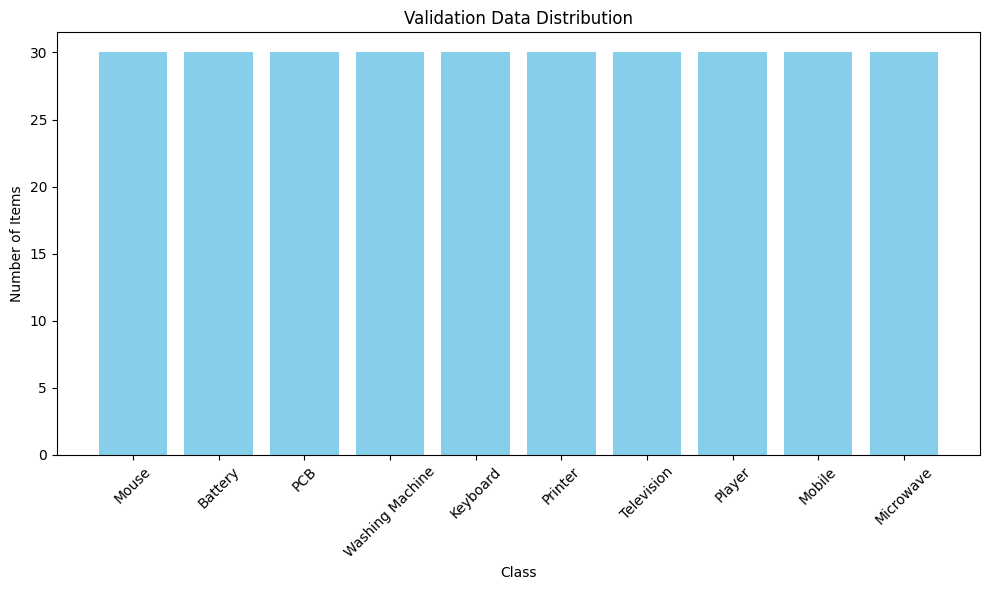

{'Battery': 30, 'Keyboard': 30, 'Microwave': 30, 'Mobile': 30, 'Mouse': 30, 'PCB': 30, 'Player': 30, 'Printer': 30, 'Television': 30, 'Washing Machine': 30}


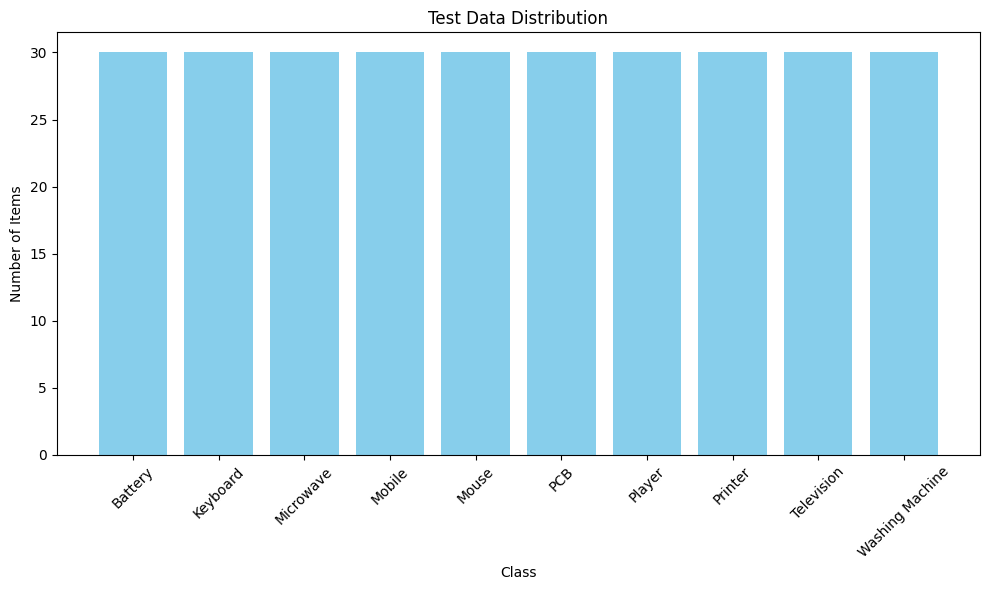

In [30]:
plot_class_distribution(datatrain, "Training Data Distribution")
plot_class_distribution(datavalid, "Validation Data Distribution")
plot_class_distribution(datatest, "Test Data Distribution")

In [38]:

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])

In [42]:
base_model = tf.keras.applications.EfficientNetV2B0(
    input_shape=(256, 256, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = True
for layer in base_model.layers[:100]:
    layer.trainable = False

In [43]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(256, 256, 3)),
    data_augmentation,
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['Accuracy'])

In [ ]:
# Define an EarlyStopping callback to stop training when validation loss stops improving
early = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',            
    patience=3,                   
    restore_best_weights=True     
)


In [ ]:
# Set the number of epochs to train the model
epochs = 15

# Train the model on the training dataset 'datatrain'
history = model.fit(
    datatrain,                      
    validation_data=datavalid,      
    epochs=epochs,                  
    batch_size=100,                 
    callbacks=[early]               
)


Epoch 1/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 221s 3s/step - Accuracy: 0.3666 - loss: 1.9891 - val_Accuracy: 0.9133 - val_loss: 0.7450
Epoch 2/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 187s 2s/step - Accuracy: 0.8557 - loss: 0.7196 - val_Accuracy: 0.9633 - val_loss: 0.2378
Epoch 3/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 192s 3s/step - Accuracy: 0.9241 - loss: 0.3035 - val_Accuracy: 0.9767 - val_loss: 0.1424
Epoch 4/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 12245s 165s/step - Accuracy: 0.9477 - loss: 0.2065 - val_Accuracy: 0.9800 - val_loss: 0.1066
Epoch 5/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 199s 3s/step - Accuracy: 0.9572 - loss: 0.1515 - val_Accuracy: 0.9767 - val_loss: 0.0883
Epoch 6/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 184s 2s/step - Accuracy: 0.9767 - loss: 0.0986 - val_Accuracy: 0.9833 - val_loss: 0.0811
Epoch 7/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 210s 3s/step - Accuracy: 0.9796 - loss: 0.0853 - val_Accuracy: 0.9800 - val_loss: 0.0776
Epoch 8/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 202s 3s/step - Accuracy: 0.9898 - loss: 0.0570 - val_Accuracy: 0.9767

In [ ]:
model.summary() 

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_4 (Sequential)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-b0 (Functional)  │ (None, 8, 8, 1280)     │     5,919,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,269,040 (62.06 MB)

 Trainable params: 5,168,458 (19.72 MB)

 Non-trainable params: 763,664 (2.91 MB)

 Optimizer params: 10,336,918 (39.43 MB)

In [ ]:
base_model.summary() 

Model: "efficientnetv2-b0"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_3         │ (None, 256, 256,  │          0 │ input_layer_7[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_3     │ (None, 256, 256,  │          0 │ rescaling_3[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 128, 128,  │        864 │ normalization_3[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 128, 128,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 128, 128,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 128, 128,  │      4,608 │ stem_activation[… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 128, 128,  │         64 │ block1a_project_… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_ac… │ (None, 128, 128,  │          0 │ block1a_project_… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_conv │ (None, 64, 64,    │      9,216 │ block1a_project_… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_bn   │ (None, 64, 64,    │        256 │ block2a_expand_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_act… │ (None, 64, 64,    │          0 │ block2a_expand_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_project_co… │ (None, 64, 64,    │      2,048 │ block2a_expand_a… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_project_bn  │ (None, 64, 64,    │        128 │ block2a_project_… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_conv │ (None, 64, 64,    │     36,864 │ block2a_project_… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_bn   │ (None, 64, 64,    │        512 │ block2b_expand_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_act… │ (None, 64, 64,    │          0 │ block2b_expand_b

 Total params: 5,919,312 (22.58 MB)

 Trainable params: 5,155,648 (19.67 MB)

 Non-trainable params: 763,664 (2.91 MB)

In [ ]:
### Plotting Training and Validation Accuracy and Loss Over Epochs

acc = history.history['Accuracy']           
val_acc = history.history['val_Accuracy']   
loss = history.history['loss']              
val_loss = history.history['val_loss']      

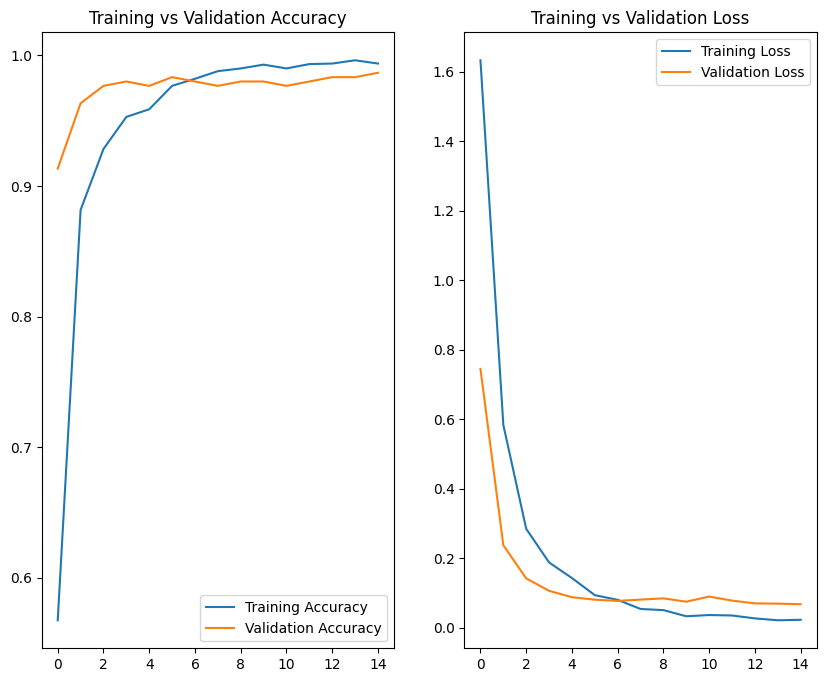

In [ ]:
epochs_range = range(len(acc))              

plt.figure(figsize=(10, 8))                 

plt.subplot(1, 2, 1)                        
plt.plot(epochs_range, acc, label='Training Accuracy')       
plt.plot(epochs_range, val_acc, label='Validation Accuracy') 
plt.legend(loc='lower right')              
plt.title('Training vs Validation Accuracy') 

plt.subplot(1, 2, 2)                        
plt.plot(epochs_range, loss, label='Training Loss')          
plt.plot(epochs_range, val_loss, label='Validation Loss')    
plt.legend(loc='upper right')              
plt.title('Training vs Validation Loss')   

plt.show()                                 

In [50]:
loss, accuracy = model.evaluate(datatest)
print(f'Test accuracy is{accuracy:.4f}, Test loss is {loss:.4f}')

10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 715ms/step - Accuracy: 0.9800 - loss: 0.0624
Test accuracy is0.9733, Test loss is 0.0843


In [ ]:
### Evaluate Model Performance on Test Data using Confusion Matrix and Classification Report

y_true = np.concatenate([y.numpy() for x, y in datatest], axis=0)  

y_pred_probs = model.predict(datatest)

y_pred = np.argmax(y_pred_probs, axis=1)                           

print(confusion_matrix(y_true, y_pred))                            
print(classification_report(y_true, y_pred))                     


10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step 
[[29  0  0  0  0  1  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0]
 [ 0  0 30  0  0  0  0  0  0  0]
 [ 0  0  0 30  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0]
 [ 0  0  0  0  0 29  1  0  0  0]
 [ 0  0  2  0  0  0 28  0  0  0]
 [ 0  0  0  0  0  1  1 28  0  0]
 [ 0  0  2  0  0  0  0  0 28  0]
 [ 0  0  0  0  0  0  0  0  0 30]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       1.00      1.00      1.00        30
           2       0.88      1.00      0.94        30
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        30
           5       0.94      0.97      0.95        30
           6       0.93      0.93      0.93        30
           7       1.00      0.93      0.97        30
           8       1.00      0.93      0.97        30
           9       1.00      1.00      1.00        30

    accuracy                     

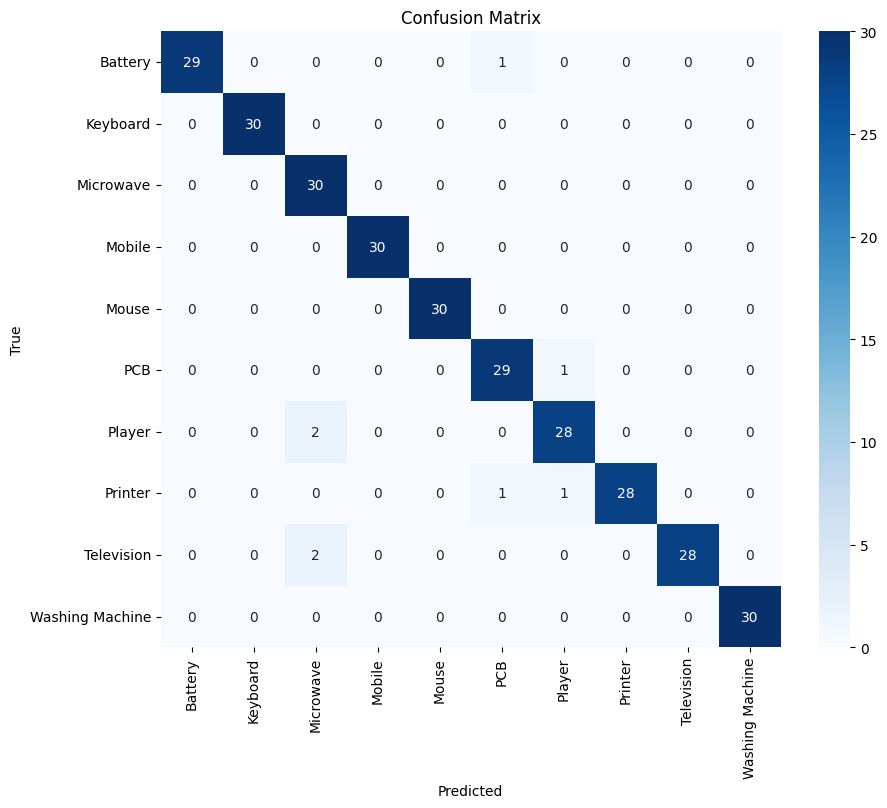

In [ ]:
### Plot Confusion Matrix as Heatmap for Better Visualization

cm = confusion_matrix(y_true, y_pred)                                     

plt.figure(figsize=(10, 8))                                         
sns.heatmap(cm, annot=True, fmt='d', 
            xticklabels=class_names, 
            yticklabels=class_names, 
            cmap='Blues')                                                 

plt.xlabel('Predicted')                                                   
plt.ylabel('True')                                                        
plt.title('Confusion Matrix')                                             
plt.show()                                                               


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


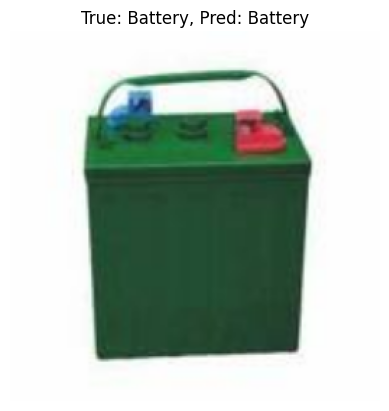

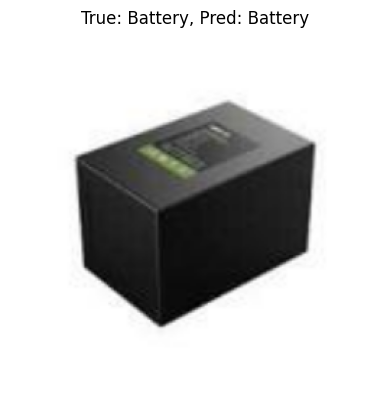

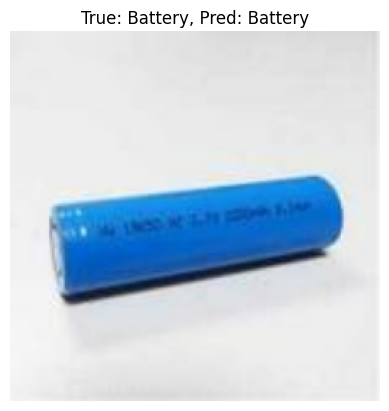

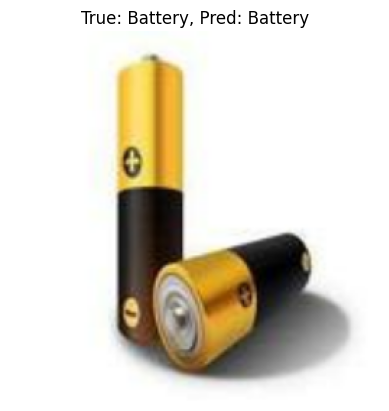

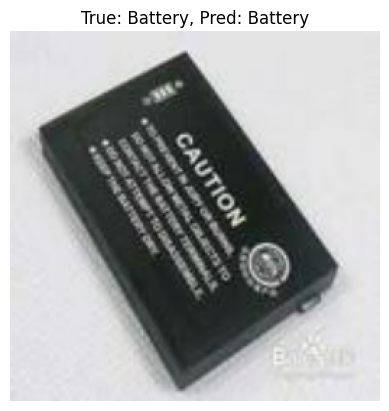

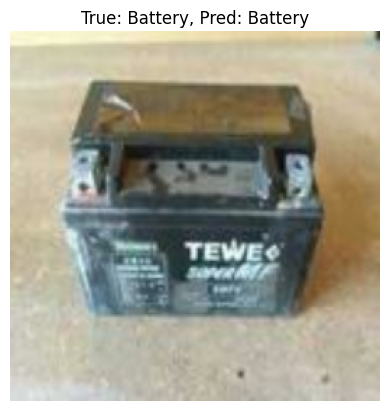

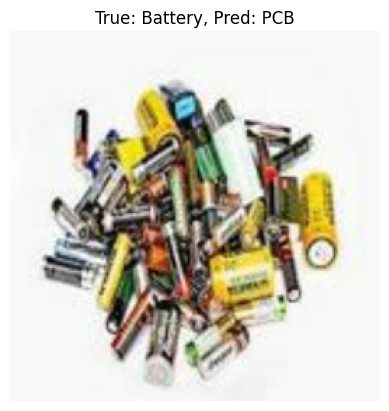

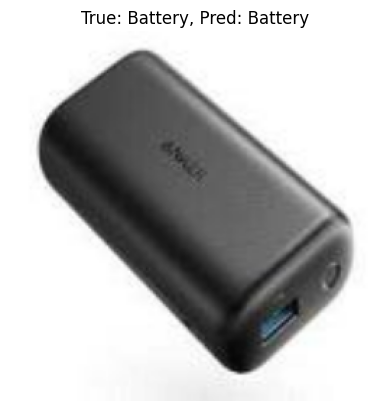

In [ ]:
### Display Sample Predictions: True Labels vs Predicted Labels

class_names = datatest.class_names                                           

for images, labels in datatest.take(1):                                     
    predictions = model.predict(images)                                     
    pred_labels = tf.argmax(predictions, axis=1)                            

    for i in range(8):                                                      
        plt.imshow(images[i].numpy().astype("uint8"))                       
        plt.title(f"True: {class_names[labels[i]]}, Pred: {class_names[pred_labels[i]]}")  
        plt.axis("off")                                                     
        plt.show()                                                          


In [54]:
# Save model in Keras format with architecture, weights, and training configuration
model.save('Efficient_classify.keras')

In [55]:
# Define your class labels
class_names = ['Battery', 'Keyboard', 'Microwave', 'Mobile', 'Mouse', 'PCB', 'Player', 'Printer', 'Television', 'Washing Machine']

# Load your Keras model
model = tf.keras.models.load_model('Efficient_classify.keras')

In [ ]:
def classify_image(img):
    img = img.resize((256, 256))
    img_array = np.array(img, dtype=np.float32)
    img_array = preprocess_input(img_array)
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    index = np.argmax(prediction)  
    class_name = class_names[index]
    confidence = prediction[0][index]

    return f"Predicted: {class_name} (Confidence: {confidence:.2f})"



In [ ]:
# Create a Gradio interface for the classify_image function
iface = gr.Interface(
    fn=classify_image,          
    inputs=gr.Image(type="pil"),
    outputs="text"             
)

iface.launch()


Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


IMPORTANT: You are using gradio version 4.31.3, however version 4.44.1 is available, please upgrade.
--------
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
